<a href="https://www.kaggle.com/code/skylarsavar/people-analytics-with-python?scriptVersionId=160295989" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

### Overview

Analyze an employee dataset to uncover the factors that lead to employee attrition. 

Attrition in the workplace represents the rate at which employees voluntarily leave a company over a set period. This poses significant problems for companies like IBM, where this fictional dataset comes from, as well as many other companies in various industries. Companies experience the loss of valuable employees and skills but also the high costs and resources associated with hiring new team members. 

High attrition rates can also create bad reputations for companys, making it increasingly difficult to attract top talent. Addressing and identifying the causes of attrition is crucial in maintaining a successful workforce.

### Problem Statement

Gaining insights into the factors influencing employees' decisions to leave provides valuable information for developing strategies to enhance employee retention and enables proactive planning for hiring needs. I will employ a systematic and methodical approach, tailored for diverse machine learning problems, to analyze and address these challenges.

### Questions to consider during analysis

* What is the likelihood of an active employee leaving the company?
* What are the key indicators of an employee leaving the company?
* What factors correlate the highest with attrition?

# **Import Libraries**

### Load & Check Dataset

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings # overcome Warnings messages 

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv


In [2]:
df = pd.read_csv('/kaggle/input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
df.isnull()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1466,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1467,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1468,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# **Exploratory Data Analysis (EDA)**

**Employee Count and Attrition Rate**

Text(0.5, 1.0, 'Employee Attrition Rate')

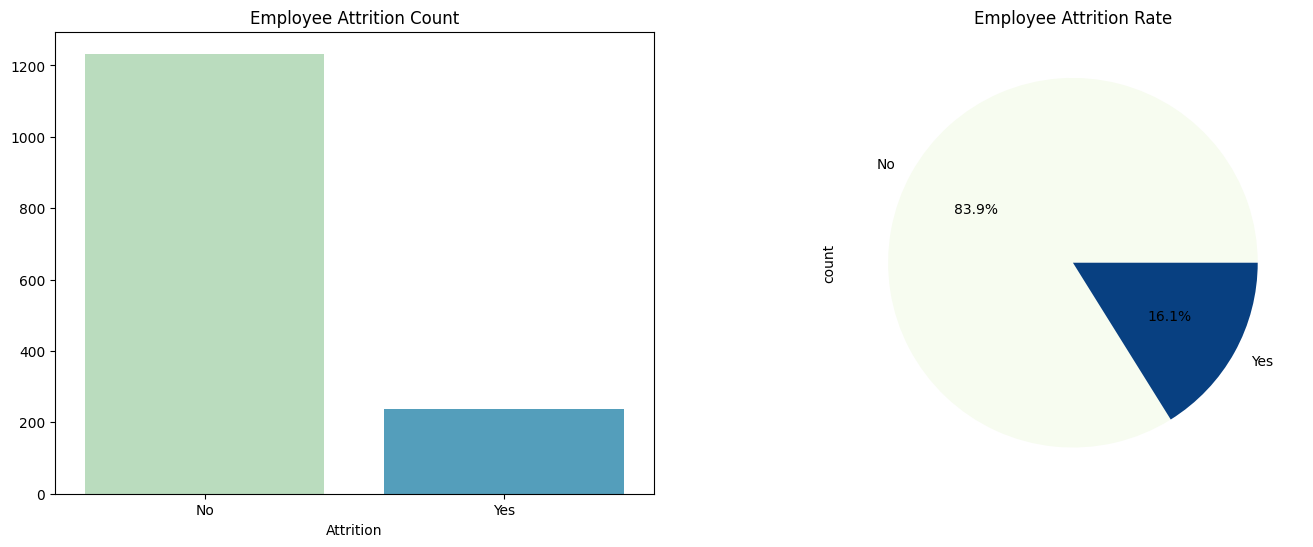

In [6]:
# First subplot: Attrition Count
plt.figure(figsize=(17,6))
plt.subplot(1,2,1)
attrition_rate=df["Attrition"].value_counts()
sns.barplot(data=df, x=attrition_rate.index, y=attrition_rate.values, palette="GnBu")
plt.title("Employee Attrition Count")

# Second subplot: Attrition Rate
plt.subplot(1,2,2)
attrition_count = df['Attrition'].value_counts()
attrition_count.plot(kind="pie",autopct='%.1F%%',colormap="GnBu")
plt.title("Employee Attrition Rate")

### Social Circumstance Analysis 

In this portion I will analyze factors such as age, gender, level of job satisfaction, and average age by salary, to see if there are any discrepencies or trends. 

In [7]:
# Defining a function for pie_bar plot visualizations 

def pie_bar_plot(df,col,hue):
    plt.figure(figsize=(15,6))
    
    # Value counts for column
    value_counts=df[col].value_counts().sort_index()
    
    # First subplot: Pie
    plt.subplot(1,2,2)
    ax1=value_counts
    ax1.plot(kind="pie",autopct='%.1F%%',colormap="GnBu")
    plt.title(F"Distribution of {col}")
    
    # Second subplot: Bar
    plt.subplot(1,2,1)
    new_df=df[df[hue] =='Yes']
    v_1=value_counts
    v_2=new_df[col].value_counts().sort_index()
    ax2=np.floor((v_2/v_1)*100).values
    sns.barplot(x=v_2.index,y=v_2.values,palette="GnBu")
    plt.title(F"Attrition Rate by {col}")
    for index, value in enumerate(v_2):
        plt.text(index,value,str(value)+" (" + str(int(ax2[index]))+ "% )",ha="center")
        
    plt.tight_layout() 

**Marital Status vs Attrition**

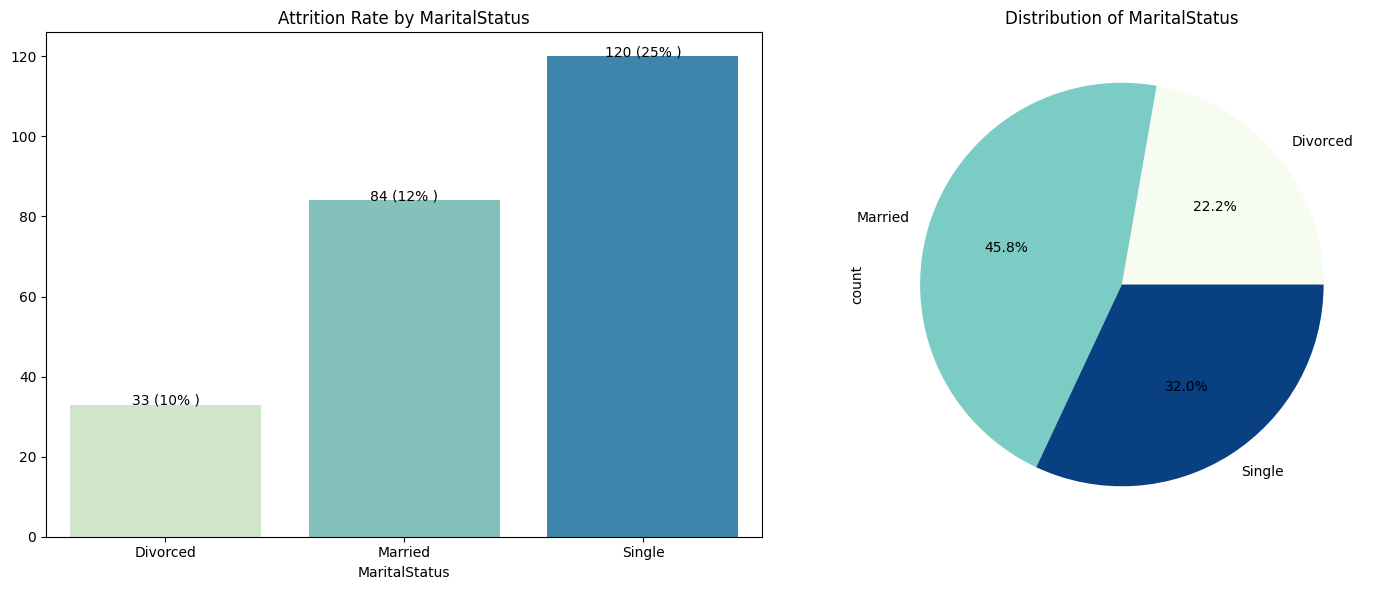

In [8]:
pie_bar_plot(df,"MaritalStatus","Attrition")

#### Insights
* Single employees have the Highest Attrition.

In [9]:
# Define function for histogram with boxplot visualizations 

def hist_box(df,col,hue):
    plt.figure(figsize=(14,6))
    
    # First subplot: Histogram
    plt.subplot(1,2,1)
    sns.histplot(data=df,x=col,hue=hue,kde=True,palette="GnBu")
    plt.title(f"Distribution by {col} & {hue}")
    
    # Second subplot: Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(data=df,x=hue,y=col,palette="GnBu")
    plt.title(f"Distribution by {col} & {hue}")
    
    plt.tight_layout()

**Age vs Attrition**

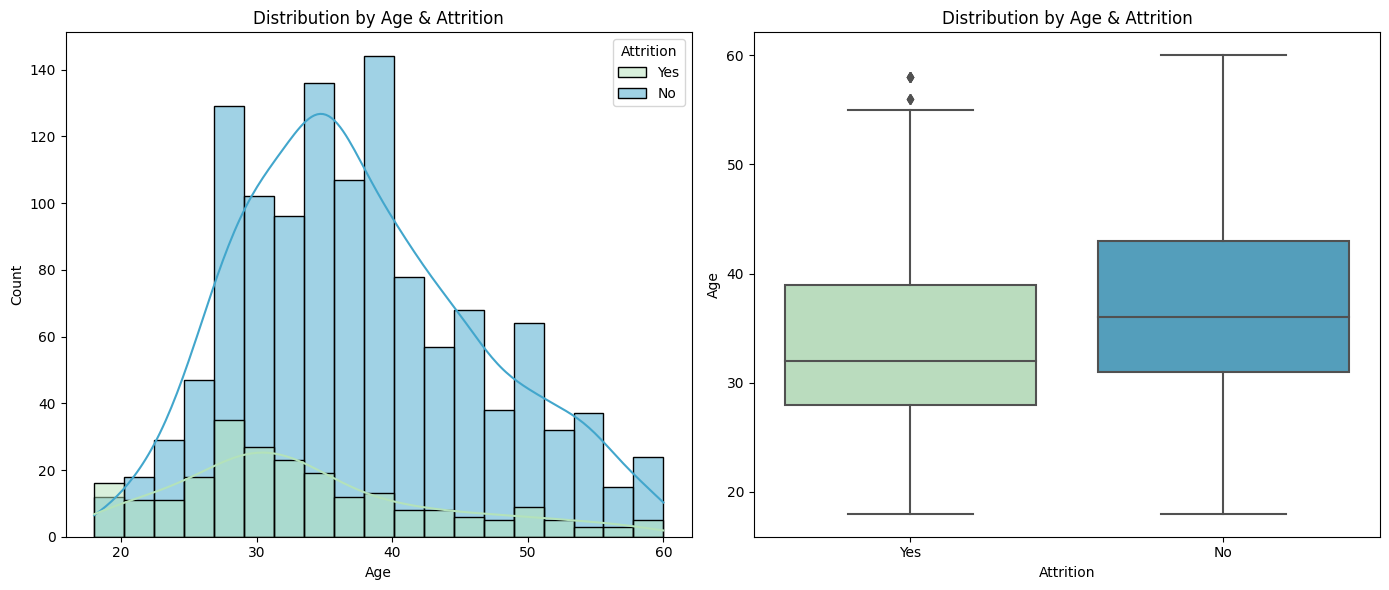

In [10]:
# Age

hist_box(df,"Age","Attrition")

#### Insights
* Employees younger then 40 tend to leave more frequently.

**Gender vs Attrition**

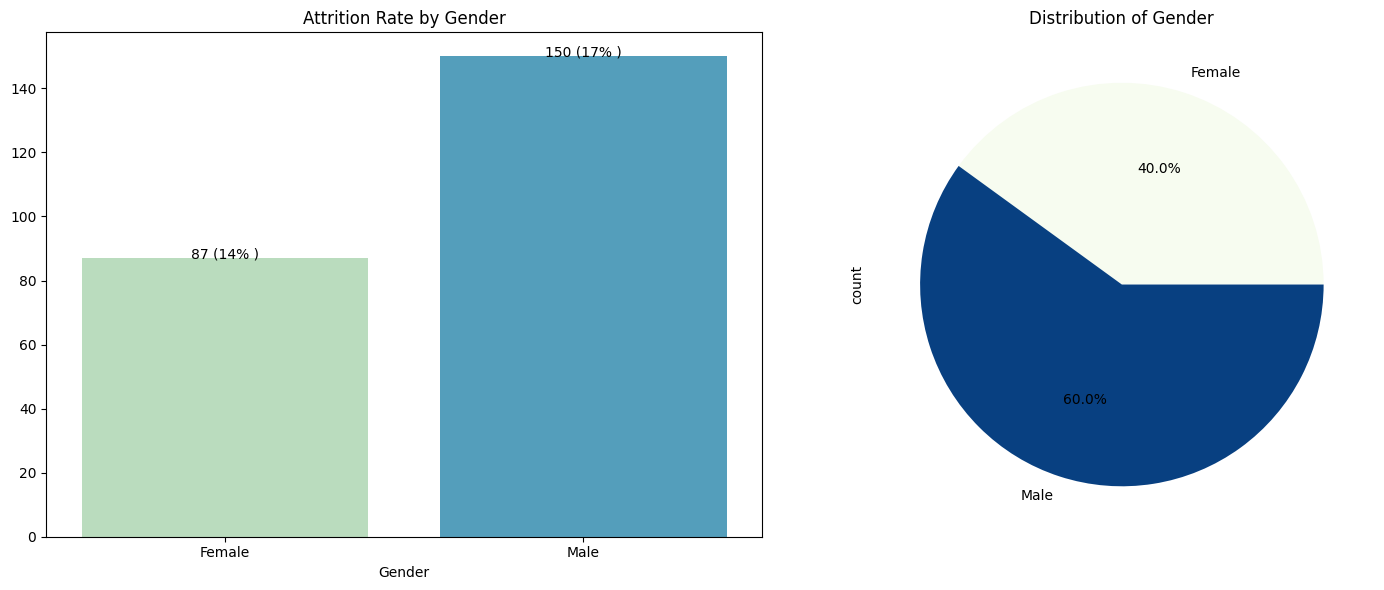

In [11]:
# Gender

pie_bar_plot(df,"Gender","Attrition")

In [12]:
# Defining a function for count_percent_plot visualizations 

def count_percent_plot(df,col,hue):
    plt.figure(figsize=(14,8))
    
    # First subplot: Employee Attrition Count
    plt.subplot(1,2,1)
    v_1=df[col].value_counts()
    sns.barplot(x=v_1.index,y=v_1.values,order=v_1.index,palette="GnBu")
    plt.title(f"Employees by {col}")
    for index, value in enumerate(v_1.values):
        count_percentage="{:.1f}%".format((value/len(df))*100)
        plt.text(index,value,f"{value} ({count_percentage})",ha="center",va="bottom")
    plt.xticks(rotation=90)
    
    # Sort values for second subplot
    v_2=df[df[hue]=='Yes'][col].value_counts().reindex(v_1.index)
    
    # Second subplot: Employee Attrition Rate
    plt.subplot(1,2,2)
    attrition_rate=(v_2/v_1 * 100).values
    sns.barplot(x=v_2.index,y=v_2.values,order=v_1.index,palette="GnBu")
    plt.title(f"Employee Attrition by {col}")
    for index, value in enumerate(v_2.values):
        attrition_percentage=("{:.1f}%".format(np.round(attrition_rate)[index],1))
        plt.text(index,value,f"{value} ({attrition_percentage})",ha="center",va="bottom")
    plt.xticks(rotation=90)
    plt.tight_layout()

**Education vs Attrition**

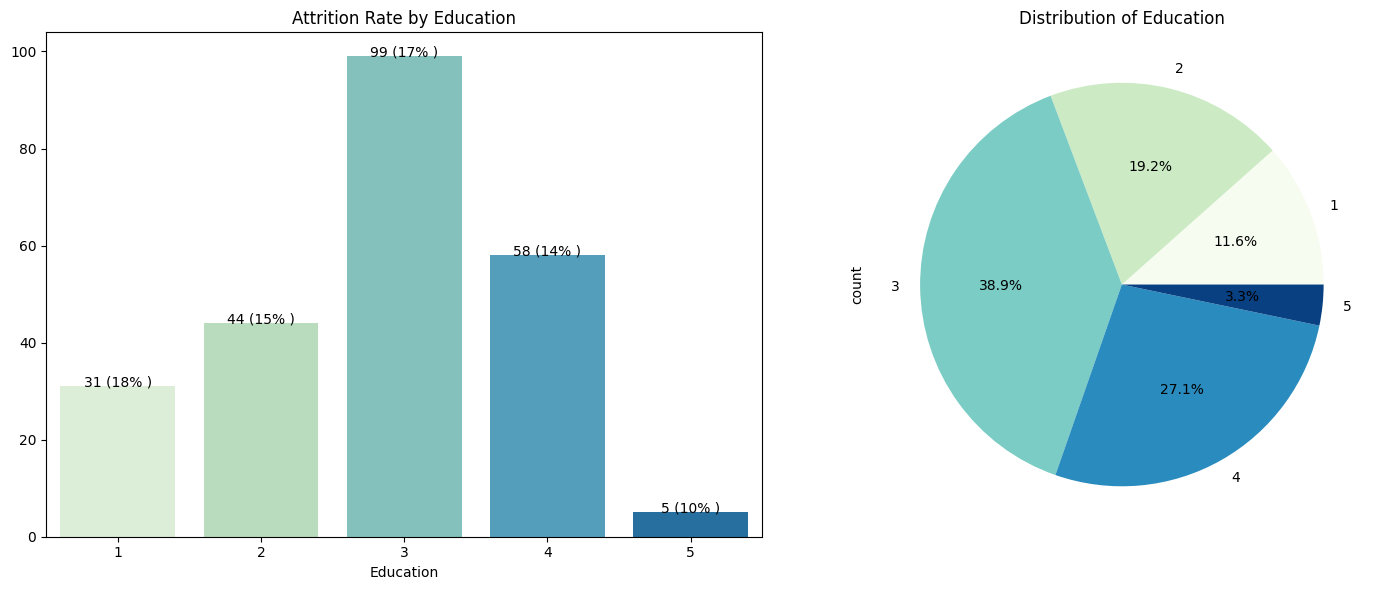

In [13]:
# Education 

pie_bar_plot(df,"Education","Attrition")

In [14]:
# Defining a function for count_percent_plot visualizations 

def count_percent_plot(df,col,hue):
    plt.figure(figsize=(14,8))
    
    # First subplot: Employee Attrition Count
    plt.subplot(1,2,1)
    v_1=df[col].value_counts()
    sns.barplot(x=v_1.index,y=v_1.values,order=v_1.index,palette="GnBu")
    plt.title(f"Employees by {col}")
    for index, value in enumerate(v_1.values):
        count_percentage="{:.1f}%".format((value/len(df))*100)
        plt.text(index,value,f"{value} ({count_percentage})",ha="center",va="bottom")
    plt.xticks(rotation=90)
    
    # Sort values for second subplot
    v_2=df[df[hue]=='Yes'][col].value_counts().reindex(v_1.index)
    
    # Second subplot: Employee Attrition Rate
    plt.subplot(1,2,2)
    attrition_rate=(v_2/v_1 * 100).values
    sns.barplot(x=v_2.index,y=v_2.values,order=v_1.index,palette="GnBu")
    plt.title(f"Employee Attrition by {col}")
    for index, value in enumerate(v_2.values):
        attrition_percentage=("{:.1f}%".format(np.round(attrition_rate)[index],1))
        plt.text(index,value,f"{value} ({attrition_percentage})",ha="center",va="bottom")
    plt.xticks(rotation=90)
    plt.tight_layout()

**Education Field vs Attrition**

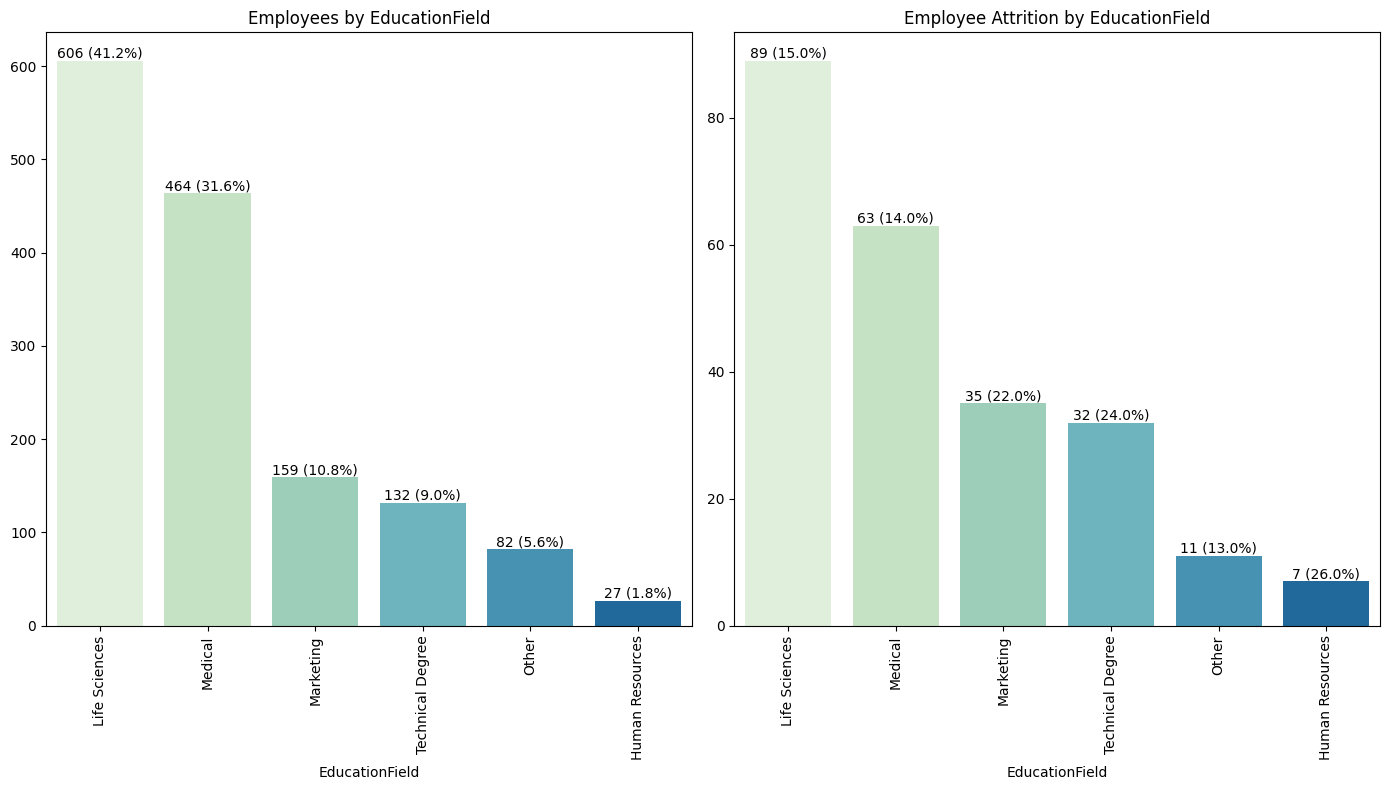

In [15]:
# Education field count_percent_plot

count_percent_plot(df,"EducationField","Attrition")

### Workplace Analysis

**Job Satisfaction vs Attrition**

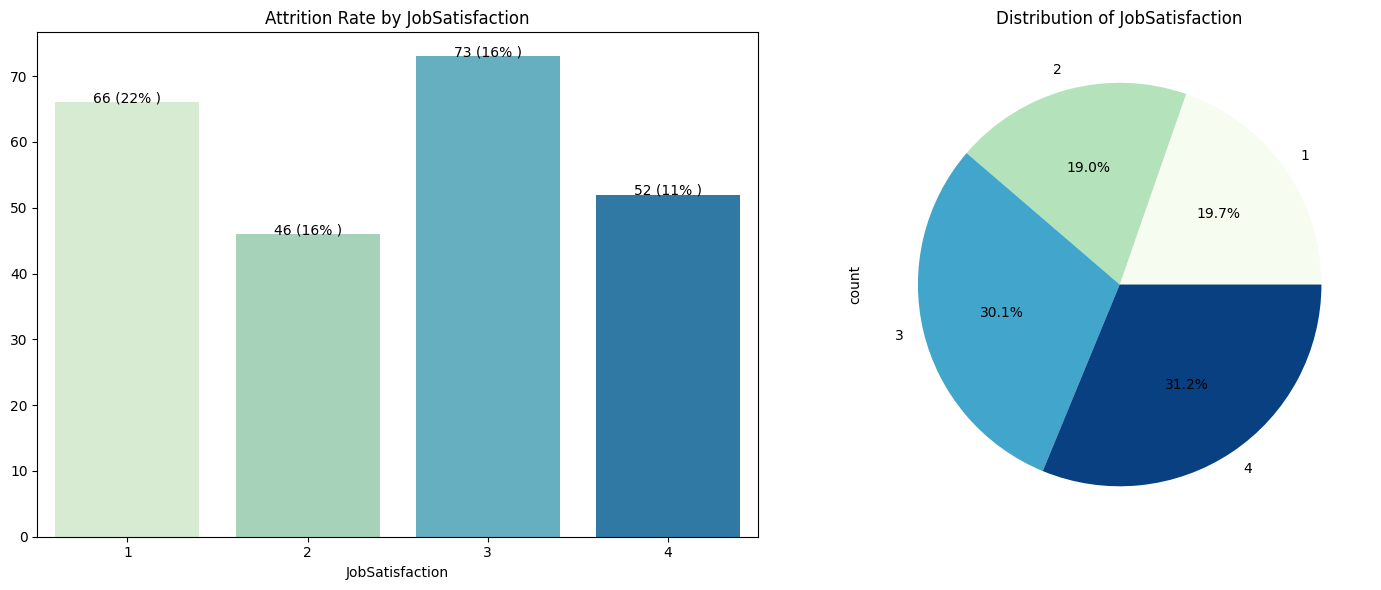

In [16]:
# Job Satisfaction vs Attrition 

pie_bar_plot(df,"JobSatisfaction","Attrition")

**Total Years at Company and Years in Current Role**

<Axes: title={'center': 'Years in Current Role'}, xlabel='YearsInCurrentRole', ylabel='Count'>

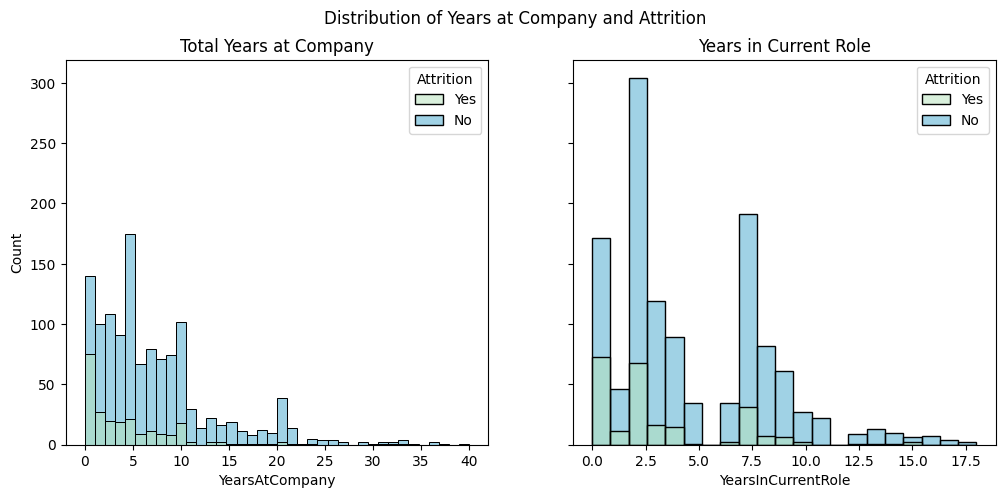

In [17]:
# Plots: Total Years at Company vs Attrition & Years in Current Role vs Attrition

fig,ax = plt.subplots(1,2, sharey=True, figsize=(12,5))
fig.suptitle('Distribution of Years at Company and Attrition')
ax[0].set_title('Total Years at Company')
ax[1].set_title('Years in Current Role')

# Years at company
sns.histplot(ax=ax[0], data=df, x="YearsAtCompany", hue="Attrition", palette="GnBu")


# Years in Current Role
sns.histplot(ax=ax[1], data=df, x="YearsInCurrentRole", hue="Attrition", palette="GnBu")

**Years at Company vs Attrition**

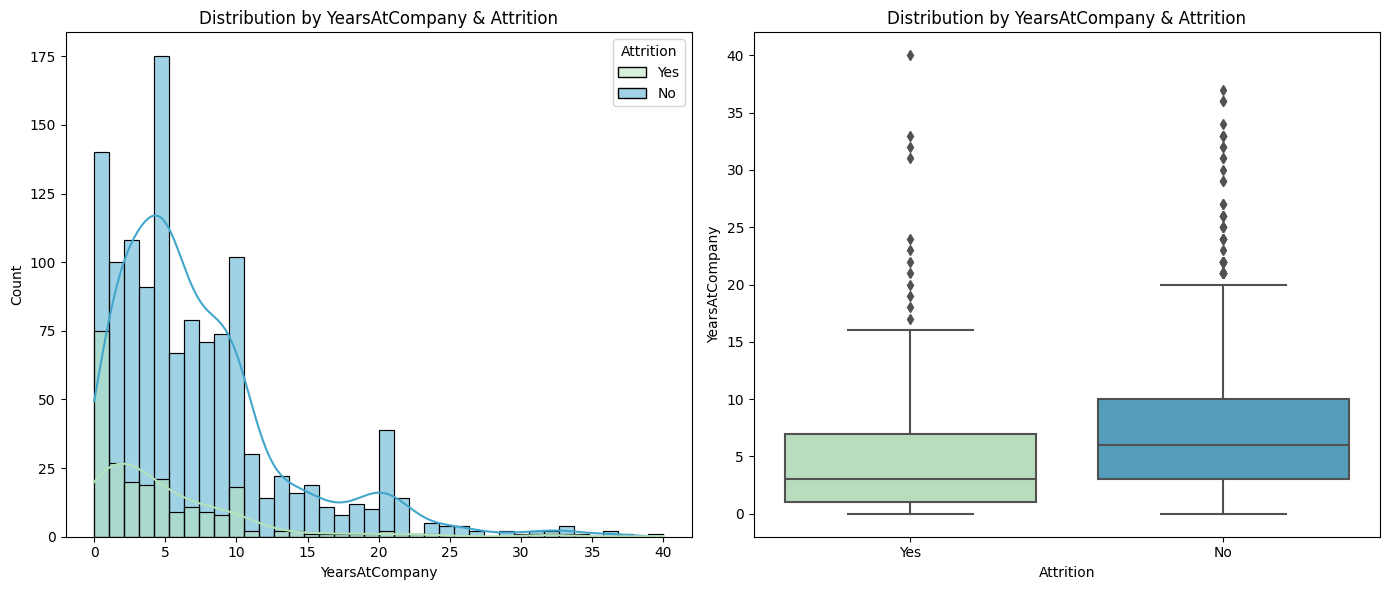

In [18]:
hist_box(df, "YearsAtCompany","Attrition")

**Years In Current Role vs Attrition**

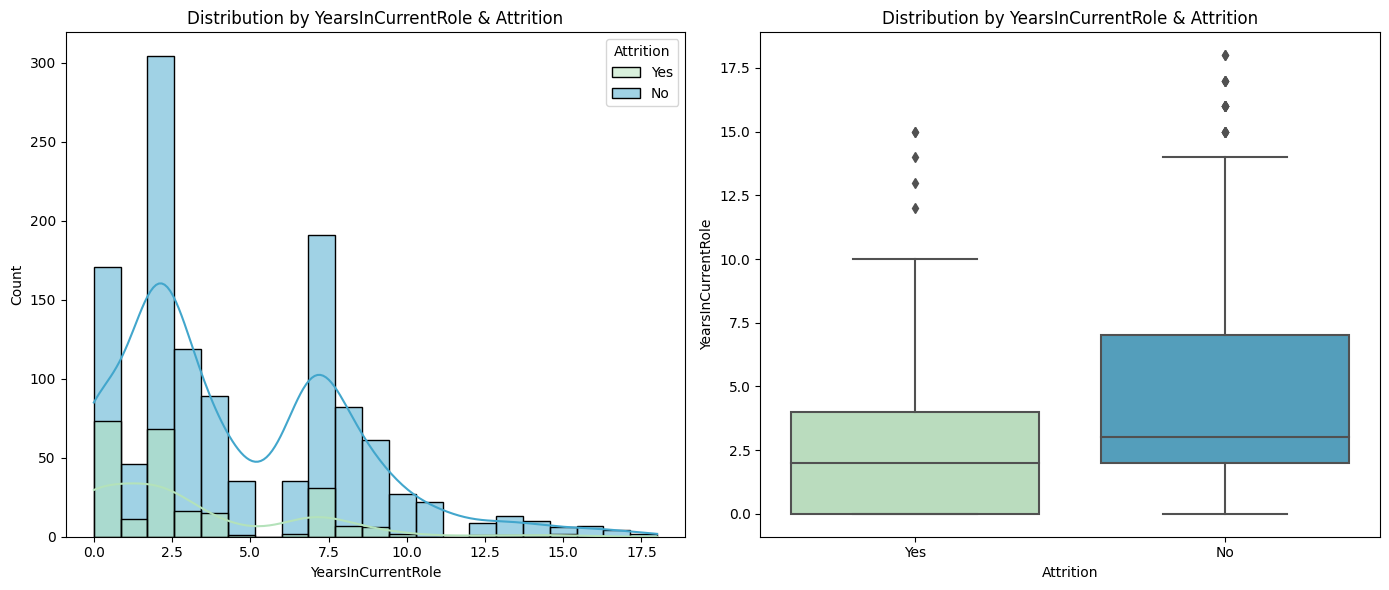

In [19]:
hist_box(df, "YearsInCurrentRole","Attrition")

#### Insights
* Employees who have been at the company for over 10 years have lower attrition rates.
* First year employees have the Highest Attrition.
* Employees who have been in their role for 8+ years have Lower Attrition.
* Employees who have been in their role 5 years or less have Higher Attrition.

**Years Since Last Promotion vs Attrition**

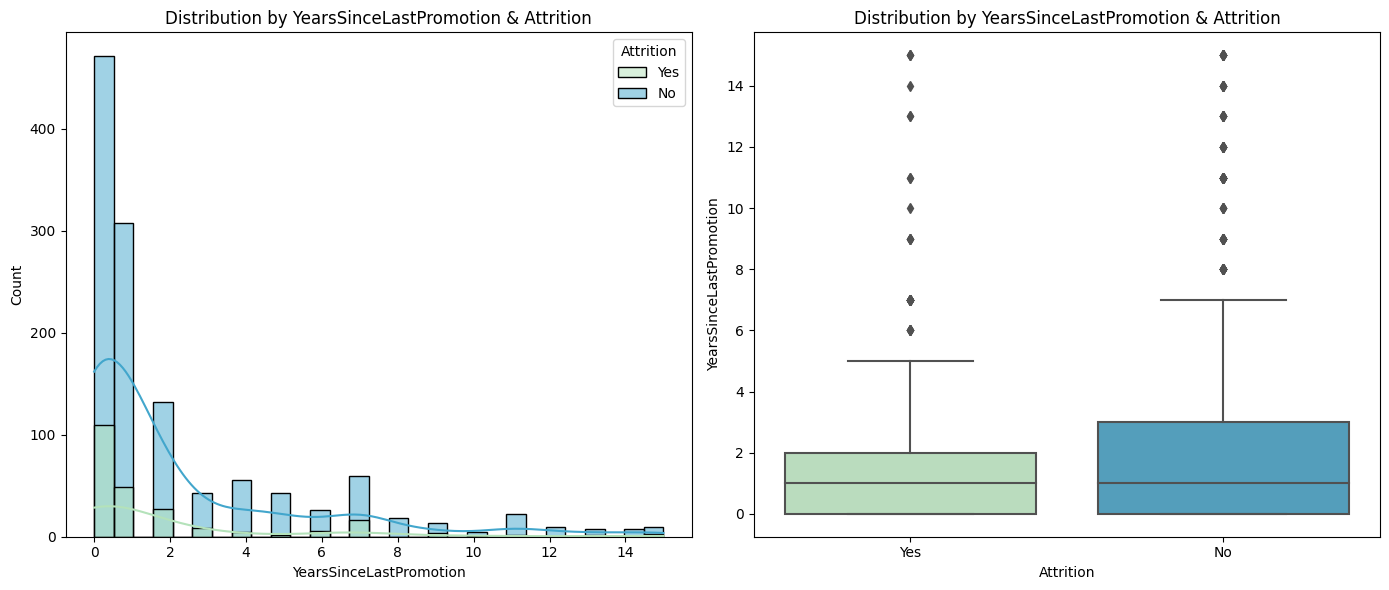

In [20]:
# Years Since Last Promotion vs Attrition

hist_box(df,"YearsSinceLastPromotion","Attrition")

**Department vs Attrition**

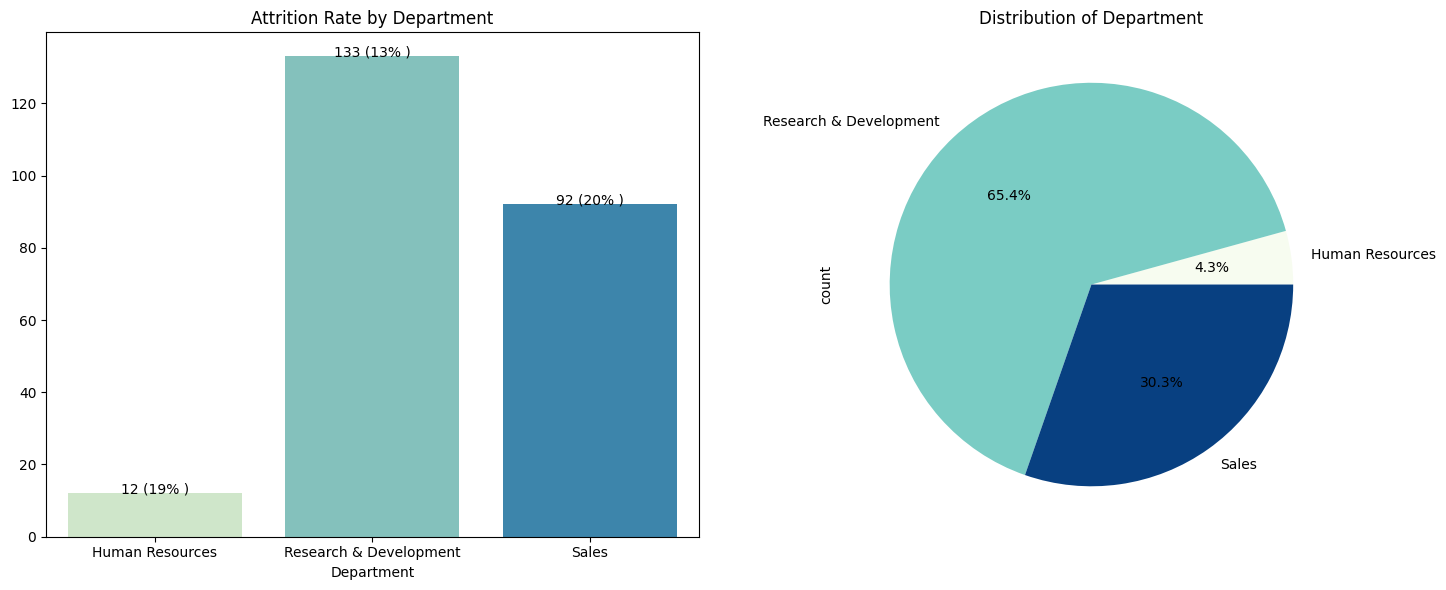

In [21]:
# Department

pie_bar_plot(df,"Department","Attrition")

#### Insights

* A majority of employees is from the Research & Development Department.
* The Sales Department has the Highest Attrition.
* Human Resources has Second Highest Attrition.

**Monthly Income vs Attrition**

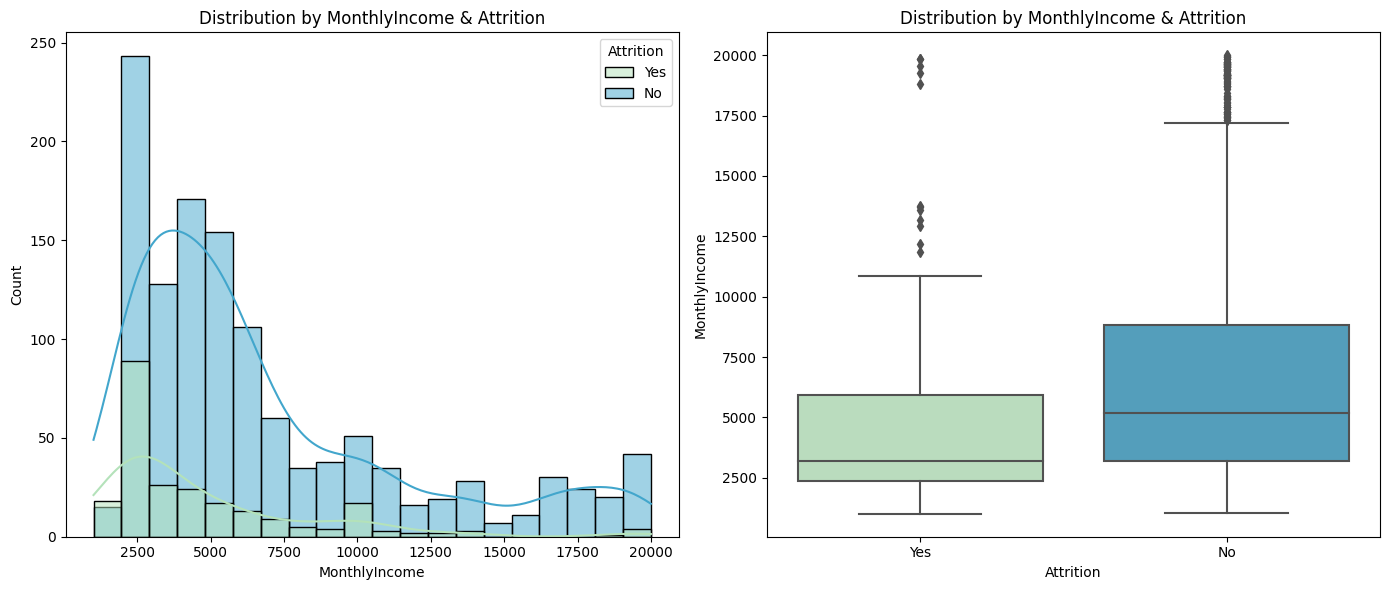

In [22]:
# Monthly income 

hist_box(df, "MonthlyIncome","Attrition")

#### Insights
* Individuals with a Monthly Income of less then 5000 tend to leave the company more, with a peak at an income of less then 2500.

**Business Travel vs Attrition**

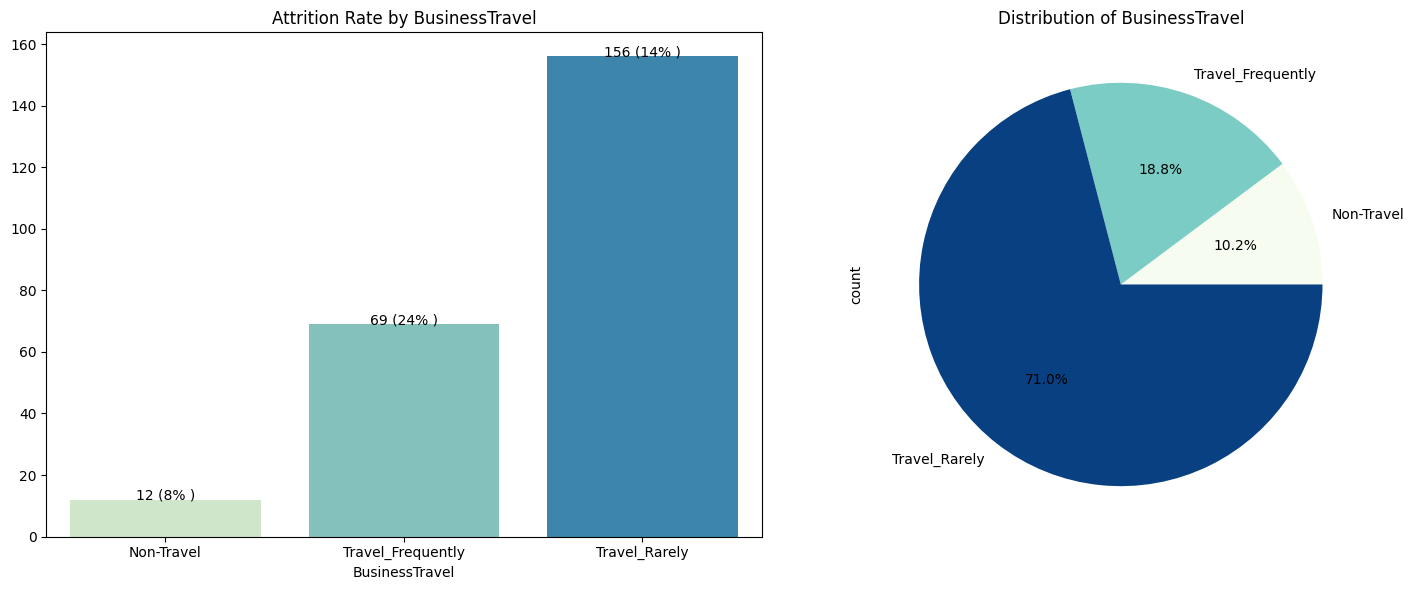

In [23]:
# Business Travel

pie_bar_plot(df,"BusinessTravel","Attrition")

#### Insights
* Employees who Travel Frequently have the Highest Attrition.

**Job Role vs Attrition**

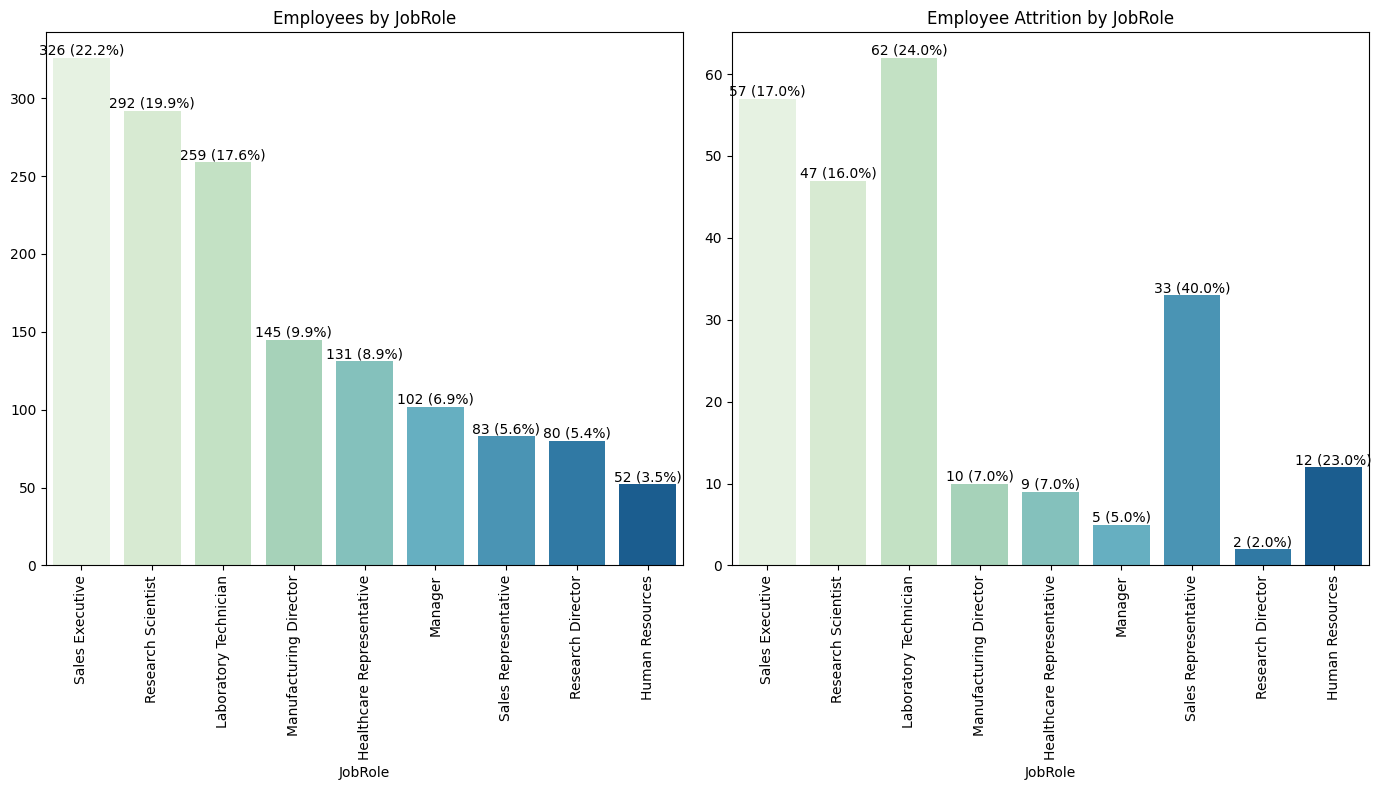

In [24]:
# Job Role count_percent_plot

count_percent_plot(df,"JobRole","Attrition")

#### Insights
* A majority of employees are Sales Representatives.
* Sales Representatives have the Highest Attriton rate with Labroratory Technician and Human Resources being the next highest two.
* Human Resources makes up the smallest portion of employees, but ranks second in Attrition.
* Research Directors and Managers have the Lowest Atrition rates, respectively.

**Job Level vs Attrition**

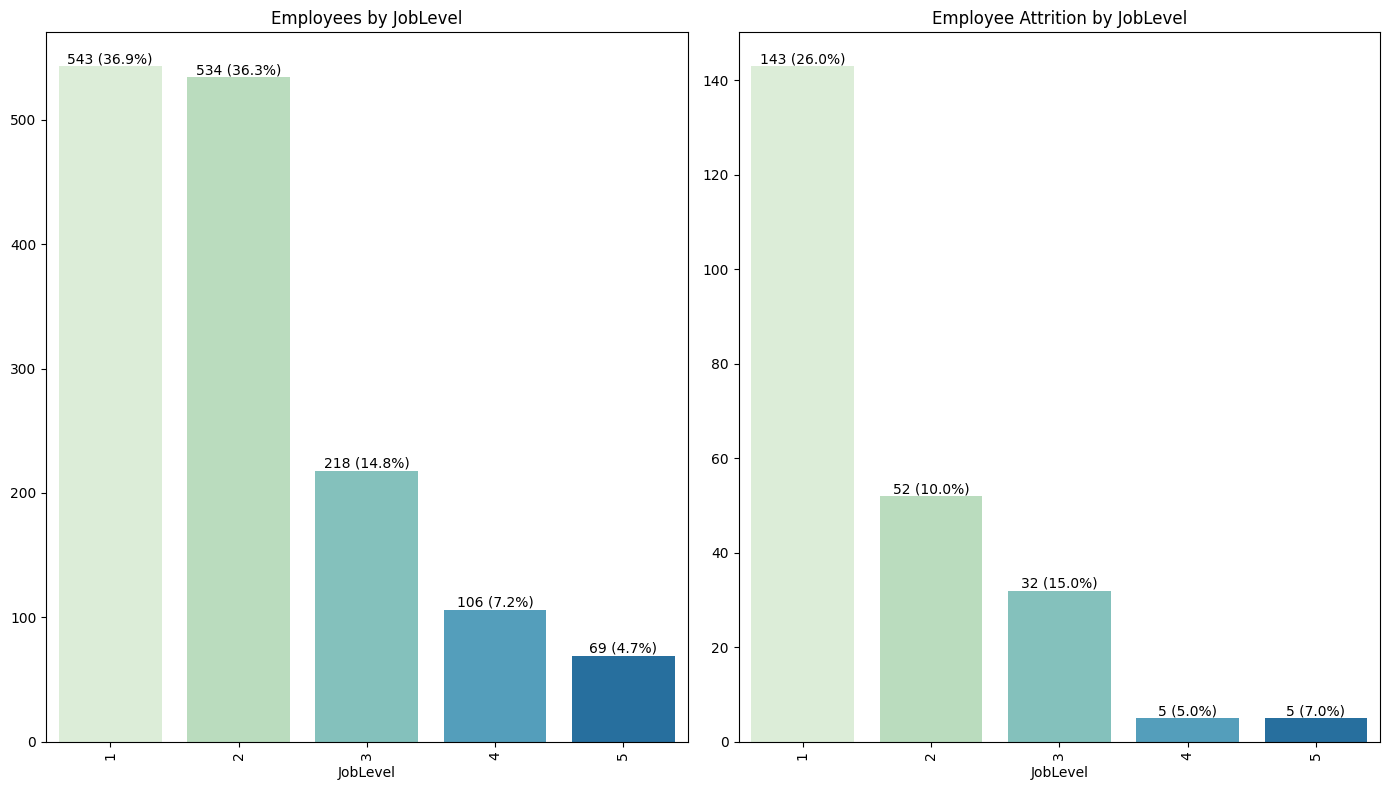

In [25]:
# Job Level 

count_percent_plot(df,"JobLevel","Attrition")

#### Insights
* Job Level 1 has the Highest Attrition rate by over 15% from the next.

# **Conclusion**

From this analysis we can conclude that age, job satisfaction, monthly income, marital status, department, years at company, years in current role, and job role are big factors in employee attrition. 

**Business Recommendations to Reduce Attrition Rates**
* Work to bring a majority of employees Job Satisfaction to be at least 'Medium', higher satisfaction fosters a better work environment, making employees more likely to want to stay.
* Increase monthly minimum salary to 3500. 
* Meet individually with both the Sales team and the HR Department to discuss why employees may be leaving more frequently and adjust accordingly.
* Employees who have been in their current role for at least 3 years are not likely to leave. 
